Credit where it's due 
https://medium.com/@randerson112358/python-for-finance-portfolio-optimization-66882498847


Set your assets to whatever you'd like them to be in the second block of code, check article for details

In [1]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
assets =  ["HICOX", "DBSCX", "TMF", "SHOP", "IOFIX", "MSFT", "AMZN","VSCFX", "NVDA", "AMD", "TSLA", "LMT", "BA", "RTN", "PGHY", "LMBS"]
#Replace these with the name of stocks you'd want to target
#TMF

In [3]:
# Assign weights to the stocks. Weights must = 1 so 0.2 for each
weights = np.array([.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,])
weights

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])

In [0]:
#Get the stock starting date
stockStartDate = '2013-01-01'

In [0]:
# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [0]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

In [0]:
#Store the adjusted close price of stock into the data frame
for stock in assets:
   df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

In [9]:
df

,HICOX,DBSCX,TMF,SHOP,IOFIX,MSFT,AMZN,VSCFX,NVDA,AMD,TSLA,LMT,BA,RTN,PGHY,LMBS
Date,,,,,,,,,,,,,,,,
2013-01-02,6.595164,NaN,16.627954,NaN,NaN,23.362539,257.309998,NaN,11.782754,2.530000,35.360001,74.625763,64.088791,50.044380,NaN,NaN
2013-01-03,6.595164,NaN,15.953198,NaN,NaN,23.049566,258.480011,NaN,11.792020,2.490000,34.770000,74.849792,64.421425,50.061455,NaN,NaN
2013-01-04,6.595164,NaN,16.095381,NaN,NaN,22.618179,259.149994,NaN,12.181071,2.590000,34.400002,75.129837,64.604370,50.377316,NaN,NaN
2013-01-07,6.595164,NaN,16.148394,NaN,NaN,22.575893,268.459991,NaN,11.829074,2.670000,34.340000,75.385841,63.307129,49.813881,NaN,NaN
2013-01-08,6.602310,NaN,16.449629,NaN,NaN,22.457466,266.380005,NaN,11.569703,2.670000,33.680000,74.377739,61.643993,49.293129,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-07,8.860000,7.89,42.709999,722.760010,8.90,183.600006,2367.610107,8.87,304.869995,51.950001,780.039978,376.540009,128.649994,NaN,20.639999,51.700001
2020-05-08,8.870000,7.91,41.090000,708.969971,8.95,184.679993,2379.610107,8.88,312.500000,53.189999,819.419983,378.399994,133.440002,NaN,20.660000,51.709999
2020-05-11,8.870000,7.91,40.070000,750.340027,8.96,186.740005,2409.000000,8.89,322.619995,55.740002,811.289978,376.559998,128.910004,NaN,20.309999,51.650002


In [0]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '

In [0]:
#Get the stocks
my_stocks = df

In [12]:
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5

<Figure size 878.4x324 with 0 Axes>

<Figure size 878.4x324 with 0 Axes>

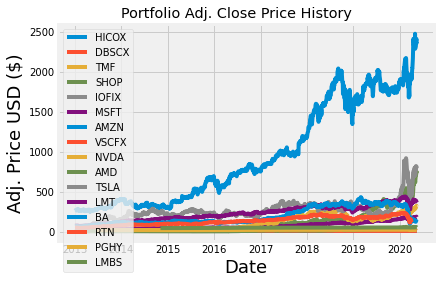

In [13]:
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [14]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,HICOX,DBSCX,TMF,SHOP,IOFIX,MSFT,AMZN,VSCFX,NVDA,AMD,TSLA,LMT,BA,RTN,PGHY,LMBS
Date,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.000000,NaN,-0.040580,NaN,NaN,-0.013396,0.004547,NaN,0.000786,-0.015810,-0.016686,0.003002,0.005190,0.000341,NaN,NaN
2013-01-04,0.000000,NaN,0.008912,NaN,NaN,-0.018716,0.002592,NaN,0.032993,0.040161,-0.010641,0.003741,0.002840,0.006309,NaN,NaN
2013-01-07,0.000000,NaN,0.003294,NaN,NaN,-0.001870,0.035925,NaN,-0.028897,0.030888,-0.001744,0.003407,-0.020080,-0.011184,NaN,NaN
2013-01-08,0.001084,NaN,0.018654,NaN,NaN,-0.005246,-0.007748,NaN,-0.021927,0.000000,-0.019220,-0.013373,-0.026271,-0.010454,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-07,0.000000,0.001269,0.049644,-0.014682,0.002252,0.005807,0.006954,0.002260,0.023775,-0.004026,-0.003246,-0.005388,0.055720,0.000000,0.011765,0.000000
2020-05-08,0.001129,0.002535,-0.037930,-0.019080,0.005618,0.005882,0.005068,0.001127,0.025027,0.023869,0.050485,0.004940,0.037233,0.000000,0.000969,0.000193
2020-05-11,0.000000,0.000000,-0.024824,0.058352,0.001117,0.011154,0.012351,0.001126,0.032384,0.047941,-0.009922,-0.004863,-0.033948,0.000000,-0.016941,-0.001160


In [15]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,HICOX,DBSCX,TMF,SHOP,IOFIX,MSFT,AMZN,VSCFX,NVDA,AMD,TSLA,LMT,BA,RTN,PGHY,LMBS
HICOX,0.000529,0.000225,0.000992,0.001289,0.001079,0.000612,0.000087,0.000333,0.000712,0.000507,0.000399,0.000865,0.001987,0.000705,0.000281,0.000113
DBSCX,0.000225,0.000848,0.000668,-0.001008,0.002361,-0.000113,-0.000091,0.000940,-0.000650,-0.000711,-0.001559,0.000187,-0.000810,-0.001174,0.000018,0.000095
TMF,0.000992,0.000668,0.162844,-0.027302,-0.011109,-0.027077,-0.023246,0.004547,-0.036796,-0.040978,-0.029653,-0.024227,-0.023962,-0.014780,0.002113,0.002726
SHOP,0.001289,-0.001008,-0.027302,0.335569,-0.002186,0.069712,0.074285,-0.001192,0.099480,0.116685,0.093698,0.035401,0.071256,0.042565,0.007131,-0.000352
IOFIX,0.001079,0.002361,-0.011109,-0.002186,0.014857,0.002807,0.000205,0.003315,0.000658,-0.000238,-0.002018,0.005616,-0.000220,0.000003,-0.000651,0.000849
MSFT,0.000612,-0.000113,-0.027077,0.069712,0.002807,0.068710,0.042913,-0.000939,0.056719,0.051333,0.045275,0.026215,0.039547,0.026804,0.003985,-0.000575
AMZN,0.000087,-0.000091,-0.023246,0.074285,0.000205,0.042913,0.092082,-0.000598,0.051917,0.053770,0.051268,0.019429,0.031611,0.019166,0.003244,-0.000875
VSCFX,0.000333,0.000940,0.004547,-0.001192,0.003315,-0.000939,-0.000598,0.001860,-0.001713,-0.001544,-0.002848,-0.000237,-0.002209,-0.002132,-0.000027,0.000335
NVDA,0.000712,-0.000650,-0.036796,0.099480,0.000658,0.056719,0.051917,-0.001713,0.168853,0.115916,0.065499,0.031528,0.052356,0.034276,0.004611,-0.001086
AMD,0.000507,-0.000711,-0.040978,0.116685,-0.000238,0.051333,0.053770,-0.001544,0.115916,0.364314,0.078044,0.029776,0.053085,0.031425,0.004936,-0.000914


In [16]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.019474716389937724

In [17]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.1395518412273293

In [18]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.2634623513591081

In [19]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 26.0%
Annual volatility/standard deviation/risk : 14.000000000000002%
Annual variance : 2.0%


In [20]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 10.4MB 6.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3


In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [0]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [23]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

{'HICOX': 0.28766, 'DBSCX': 0.3578, 'TMF': 0.04232, 'SHOP': 0.0325, 'IOFIX': 0.0, 'MSFT': 0.0, 'AMZN': 0.01745, 'VSCFX': 0.0, 'NVDA': 0.02344, 'AMD': 0.00764, 'TSLA': 0.01926, 'LMT': 0.04722, 'BA': 0.0, 'RTN': 0.0, 'PGHY': 0.0, 'LMBS': 0.16472}
Expected annual return: 11.4%
Annual volatility: 4.3%
Sharpe Ratio: 2.20


(0.11440481928808738, 0.042988920491483965, 2.196026748491831)

In [24]:
pip install pulp

     |████████████████████████████████| 40.6MB 109kB/s 


In [25]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=37786)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'HICOX': 1225.0, 'DBSCX': 1705.0, 'TMF': 38.0, 'SHOP': 2.0, 'NVDA': 3.0, 'AMD': 6.0, 'TSLA': 1.0, 'LMT': 5.0, 'PGHY': 8.0, 'LMBS': 121.0}
Funds remaining: $2.80
